
This notebook is using 13 insects for recognization. Insects are:
1. `Aphids`
2. `Fruit Fly`
3. `Caterpillar`
4. `Colorado Potato Beetle`
5. `Leaf Footed Bugs`
6. `Grasshoper`
7. `Thrips`
8. `Mexican Bean Beetle`
9. `Leaf Miners`
10. `White Flies`
11. `Mealy Bug`
12. `Spider Mites`
13. `Stink Bug`

Trainning and Validation will be done by using these insects' images.

In [ ]:
! pip install fastai
! pip install fastbook

# Activate GPU for better performance

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Import important libraries

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

# Data Creation and Augmentation


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/zip/insects'

In [ ]:
with tf.device('/device:GPU:0'):
  dblock = DataBlock(
      blocks = (ImageBlock,CategoryBlock),
      get_items =get_image_files,
      splitter = RandomSplitter(valid_pct = .2, seed = 42),
      get_y = parent_label,
      item_tfms= Resize(128)
  )

In [ ]:
with tf.device('/device:GPU:0'):  
  loader = dblock.dataloaders(path,bs = 16)

In [ ]:
with tf.device('/device:GPU:0'):  
  loaders = dblock.dataloaders(path)

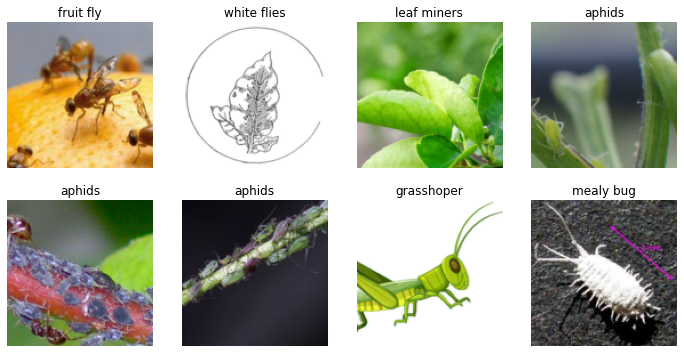

In [ ]:
with tf.device('/device:GPU:0'):
  loaders.train.show_batch(max_n=8,nrows=2)

In [ ]:
with tf.device('/device:GPU:0'):
  dblock = dblock.new(item_tfms = Resize(128,ResizeMethod.Squish) )
  dblock = dblock.new(item_tfms = Resize(128,ResizeMethod.Pad,pad_mode='zeros') )

In [ ]:
with tf.device('/device:GPU:0'):
  torch.save(loaders,'/content/drive/MyDrive/Colab Notebooks/zip/aug3_images.pkl')

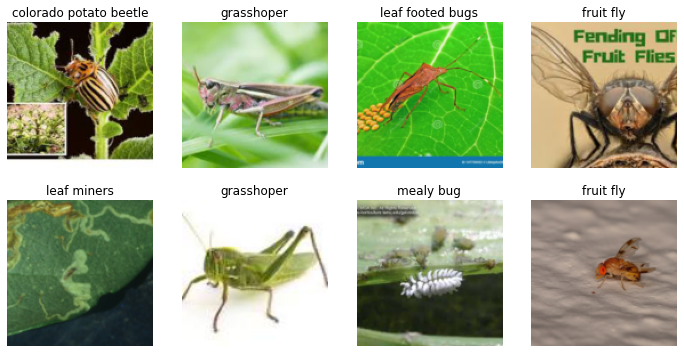

In [ ]:

loader.train.show_batch(max_n=8,nrows=2)


In [ ]:
aug_img = '/content/drive/MyDrive/Colab Notebooks/zip/aug3_images.pkl'

In [ ]:
with tf.device('/device:GPU:0'):
  load_img = torch.load(aug_img)

# Trainning

In [ ]:
with tf.device('/device:GPU:0'):
  model = vision_learner(load_img,resnet34,metrics=[error_rate,accuracy])
  model.fine_tune(10)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.286946,1.175853,0.349711,0.650289,20:54


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.237889,0.856846,0.262042,0.737958,00:46
1,0.906032,0.672063,0.194605,0.805395,00:47
2,0.621249,0.670008,0.183044,0.816956,00:45
3,0.391392,0.674781,0.172447,0.827553,00:46
4,0.251519,0.656758,0.157996,0.842004,00:45
5,0.167297,0.658415,0.158960,0.841040,00:47
6,0.104093,0.627626,0.152216,0.847784,00:46
7,0.086510,0.656431,0.159923,0.840077,00:46
8,0.052942,0.641640,0.149326,0.850674,00:46
9,0.039236,0.628839,0.151252,0.848748,00:48


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/zip/model3-86%')

Path('/content/drive/MyDrive/Colab Notebooks/zip/model3-86%.pth')

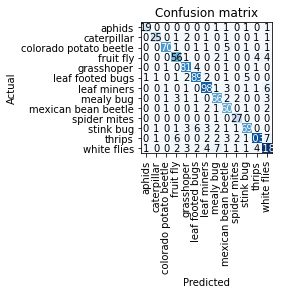

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(12,nrows = 4)

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [ ]:
path = f'/content/drive/MyDrive/Colab Notebooks/zip/insects'
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), f'{path}/{cat}')

# Save the final model

In [ ]:
model.export('/content/drive/MyDrive/Colab Notebooks/zip/models/model3-86%.pkl')